In this part, we shall conduct data analysis to try and understand if the magnitude of the reward associated with a particular stimulus plays a role in shaping the learning process and subsequently, on memory. This would give us an idea of whether higher reward or punishment causes greater tendency to approach/stay averse of an object. 

#### Learning and the Magnitutde of Reward associated with the Stimulus.
- **$H_0$:** There is no relation between the magnitute of reward associated with a particular stimulus and the learning about the stimulus. 
<br>

- **$H_1$:** Higher the magnitude of the reward associated with a stimulus, better the subject learns to avoid/approach the stimulus.


#### Memory and the Magnitutde of Reward associated with the Stimulus.

- **$H_0$:** There is no relation between the magnitute of reward associated with a particular stimulus and the memory associated with the stimulus. 
<br>

- **$H_2$:** Higher the magnitude of the reward associated with a stimulus, better the subject remembers the stimulus.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import os

### Importing Datasets


In [3]:
e1_learning = pd.read_csv("../data/e1/e1_learning_data.csv")
e1_learning = e1_learning.dropna()
e1_learning.head()

,subject_id,task_part,block_condition,block_order,task_block,trial_index,stimulus,cat_type,mean_cat_reward,approach_reward,key_press,rt,points,stimulus_repetition,correct_response,correct_response_made
0,3768,learning,2,1,animals,73,images/horse7.png,neutral,0,2,1,1148.0,2,1,1,1.0
1,3768,learning,2,1,animals,75,images/cow5.png,bad,-3,-4,0,347.0,0,1,0,1.0
2,3768,learning,2,1,animals,77,images/cow8.png,bad,-3,-2,1,618.0,-2,1,0,0.0
3,3768,learning,2,1,animals,79,images/horse7.png,neutral,0,2,1,306.0,2,2,1,1.0
4,3768,learning,2,1,animals,81,images/goat6.png,good,5,8,0,1521.0,0,1,1,0.0


First we do an exploratory data analysis and visualisations on the data to get an idea of how the variables interact.

#### Correlation between magnitude of reward and the Percentage correct response.

In [4]:
# create new variable e1_learning_b2 where only those entries are there where the column block_condition is equal to 2
e1_learning_b2 = e1_learning[e1_learning['block_condition'] == 2]
e1_learning_b2.head()

,subject_id,task_part,block_condition,block_order,task_block,trial_index,stimulus,cat_type,mean_cat_reward,approach_reward,key_press,rt,points,stimulus_repetition,correct_response,correct_response_made
0,3768,learning,2,1,animals,73,images/horse7.png,neutral,0,2,1,1148.0,2,1,1,1.0
1,3768,learning,2,1,animals,75,images/cow5.png,bad,-3,-4,0,347.0,0,1,0,1.0
2,3768,learning,2,1,animals,77,images/cow8.png,bad,-3,-2,1,618.0,-2,1,0,0.0
3,3768,learning,2,1,animals,79,images/horse7.png,neutral,0,2,1,306.0,2,2,1,1.0
4,3768,learning,2,1,animals,81,images/goat6.png,good,5,8,0,1521.0,0,1,1,0.0


/home/sruj/miniconda3/envs/env/lib/python3.12/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


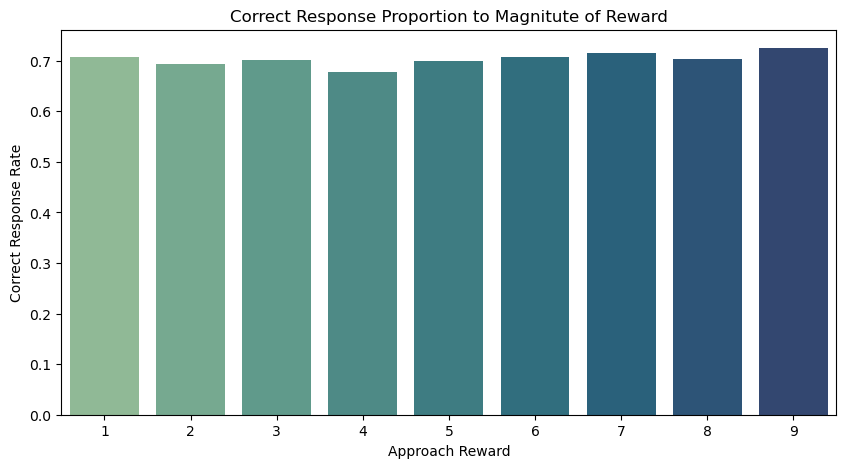

In [5]:
# create an empty dictionary called RvsC
RvsC = {}
R_ctr = {}
for index, row in e1_learning_b2.iterrows():
    if abs(int(row['approach_reward'])) in R_ctr:
        R_ctr[abs(int(row['approach_reward']))] += 1
        if row['correct_response_made'] == 1:
            RvsC[abs(int(row['approach_reward']))] += 1
        
    else:
        R_ctr[abs(int(row['approach_reward']))] = 1
        RvsC[abs(int(row['approach_reward']))] = 0
        if row['correct_response_made'] == 1:
            RvsC[abs(int(row['approach_reward']))] += 1

    
for key,value in RvsC.items():
    RvsC[key] = value/R_ctr[key]

# sort the dictionary RvsC in ascending order
RvsC = dict(sorted(RvsC.items(), key=lambda x: int(x[0])))

# plot a bargraph depicting the correct response made to each approach reward, sort the x-axis in ascending order
plt.figure(figsize=(10,5))
sns.barplot(x=list(RvsC.keys()), y=list(RvsC.values()), palette='crest')
plt.xlabel('Approach Reward')
plt.ylabel('Correct Response Rate')
plt.title('Correct Response Proportion to Magnitute of Reward')

plt.show()

In [6]:
import numpy as np
from scipy import stats

# Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(list(RvsC.values()))
print(shapiro_test)

shapiro_test = stats.shapiro(list(RvsC.keys()))
print(shapiro_test)


# Levene test for homogeneity of variance
levene_test = stats.levene(list(RvsC.keys()), list(RvsC.values()))
print(levene_test)


ShapiroResult(statistic=0.9593628376291573, pvalue=0.7916269657906373)
ShapiroResult(statistic=0.9722884258803877, pvalue=0.913560953190048)
LeveneResult(statistic=22.669162076193626, pvalue=0.0002124982625388786)


In [7]:
# Pearson correlation test if the data is normally distributed and homoscedastic
pearson_corr = stats.pearsonr(list(RvsC.keys()), list(RvsC.values()))
print(pearson_corr)

PearsonRResult(statistic=0.5407957108534478, pvalue=0.1327339444907063)


Hence, the initial hypothesis testing tells us that there is no significant correlation between the magnitude of reward and the percentage of correct responses as we cannot reject the null hypothesis. 

#### Correlation between magnitude of reward and the Percentage correct response.

In [8]:
e1_memory = pd.read_csv("../data/e1/e1_memory_data.csv")
e1_memory = e1_memory.dropna()
e1_memory.head()

,subject_id,task_part,block_order,block_condition,category_type,num_stim_rep,image,category,task_block,stim_num,correct_mem_response,mem_response,confidence,rt,mem_acc,conf_number,conf_rating,foil_type,memory_delay
0,3768,memory_trial,1,2,old,6.0,horse7.png,horse,animals,7,old,old,definitely,1866.0,1.0,1.0,4.0,old,7.0
1,3768,memory_trial,1,2,old,6.0,cow5.png,cow,animals,5,old,old,definitely,1792.0,1.0,1.0,4.0,old,7.0
2,3768,memory_trial,1,2,old,3.0,cow8.png,cow,animals,8,old,new,definitely,3074.0,0.0,1.0,1.0,old,7.0
3,3768,memory_trial,1,2,old,6.0,goat6.png,goat,animals,6,old,old,definitely,1411.0,1.0,1.0,4.0,old,7.0
4,3768,memory_trial,1,2,old,3.0,goat5.png,goat,animals,5,old,new,maybe,3348.0,0.0,0.0,2.0,old,7.0


In [9]:
# in e1_learning_b2, under the columnn 'stimulus', remove the first 7 characters from each entry
e1_learning_b2['stimulus'] = e1_learning_b2['stimulus'].str[7:]
e1_learning_b2.head()

/tmp/ipykernel_23718/3340906262.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  e1_learning_b2['stimulus'] = e1_learning_b2['stimulus'].str[7:]


,subject_id,task_part,block_condition,block_order,task_block,trial_index,stimulus,cat_type,mean_cat_reward,approach_reward,key_press,rt,points,stimulus_repetition,correct_response,correct_response_made
0,3768,learning,2,1,animals,73,horse7.png,neutral,0,2,1,1148.0,2,1,1,1.0
1,3768,learning,2,1,animals,75,cow5.png,bad,-3,-4,0,347.0,0,1,0,1.0
2,3768,learning,2,1,animals,77,cow8.png,bad,-3,-2,1,618.0,-2,1,0,0.0
3,3768,learning,2,1,animals,79,horse7.png,neutral,0,2,1,306.0,2,2,1,1.0
4,3768,learning,2,1,animals,81,goat6.png,good,5,8,0,1521.0,0,1,1,0.0


In [10]:
# remove all other occurances except the first occurance of each stimulus
e1_learning_b2 = e1_learning_b2.drop_duplicates(subset='stimulus', keep='first')

# create a dictionary for stimulus as key and the associated apprach_reward

stimulus_reward = {}
for index, row in e1_learning_b2.iterrows():
    stimulus_reward[row['stimulus']] = row['approach_reward']



/home/sruj/miniconda3/envs/env/lib/python3.12/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


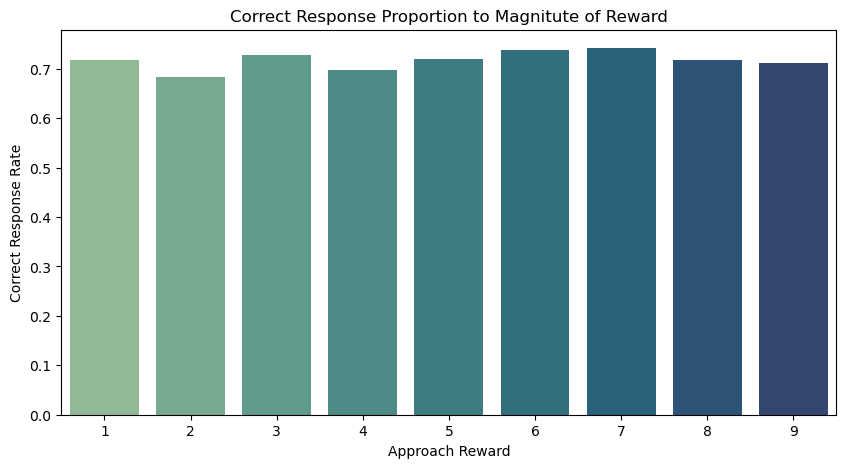

In [11]:
# create new variable e1_memory_b2 where only those entries are there where the column block_condition is equal to 2
e1_memory_b2 = e1_memory[e1_memory['block_condition'] == 2]

RvsC = {}
R_ctr = {}
for index, row in e1_memory_b2.iterrows():
    if abs(int(stimulus_reward[row['image']])) in R_ctr:
        R_ctr[abs(int(stimulus_reward[row['image']]))] += 1
        if row['mem_acc'] == 1:
            RvsC[abs(int(stimulus_reward[row['image']]))] += 1
        
    else:
        R_ctr[abs(int(stimulus_reward[row['image']]))] = 1
        RvsC[abs(int(stimulus_reward[row['image']]))] = 0
        if row['mem_acc'] == 1:
            RvsC[abs(int(stimulus_reward[row['image']]))] += 1


for key,value in RvsC.items():
    RvsC[key] = value/R_ctr[key]

# sort the dictionary RvsC in ascending order
RvsC = dict(sorted(RvsC.items(), key=lambda x: int(x[0])))

# plot a bargraph depicting the correct response made to each approach reward, sort the x-axis in ascending order
plt.figure(figsize=(10,5))
sns.barplot(x=list(RvsC.keys()), y=list(RvsC.values()), palette='crest')
plt.xlabel('Approach Reward')
plt.ylabel('Correct Response Rate')
plt.title('Correct Response Proportion to Magnitute of Reward')

plt.show()
    

In [12]:
shapiro_test = stats.shapiro(list(RvsC.values()))
print(shapiro_test)

shapiro_test = stats.shapiro(list(RvsC.keys()))
print(shapiro_test)


# Levene test for homogeneity of variance
levene_test = stats.levene(list(RvsC.keys()), list(RvsC.values()))
print(levene_test)

ShapiroResult(statistic=0.9531214674479116, pvalue=0.7243170577636471)
ShapiroResult(statistic=0.9722884258803877, pvalue=0.913560953190048)
LeveneResult(statistic=22.586405608075708, pvalue=0.0002163088265287727)


In [13]:
# check if there exists a correlation between the approach reward and the correct response made
correlation = stats.pearsonr(list(RvsC.keys()), list(RvsC.values()))
print(correlation)


PearsonRResult(statistic=0.35292411842106747, pvalue=0.3515353436272653)


Hence, The null hypothesis cannot be rejected. Hence, we cannot conclude that stimuli with higher rewards are associated with better retention. 